<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/Week%204/Week_4_compas_scores_two_years_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount file

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Ganti path sesuai lokasi file di Google Drive
file_path = "/content/drive/MyDrive/Dataset/compas-scores-two-years.csv"
# Membaca file Excel
df = pd.read_csv(file_path)


# EDA and preprocessing

In [4]:
# Tampilkan kolom kategorikal dan numerikal
print("\n--- Semua Kolom ---")
print(df.columns.tolist())

# Pisahkan kolom numerikal dan kategorikal
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("\n--- Kolom Categorikal ---")
print(list(categorical_cols))
print("\n--- Kolom Numerikal ---")
print(list(numerical_cols))


--- Semua Kolom ---
['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date', 'c_arrest_date', 'c_days_from_compas', 'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc', 'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date', 'v_type_of_assessment', 'v_decile_score', 'v_score_text', 'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1', 'start', 'end', 'event', 'two_year_recid']

--- Kolom Categorikal ---
['name', 'first', 'last', 'compas_screening_date', 'sex', 'dob', 'age_cat', 'race', 'c_jail_in', 'c_jail_out', 'c_case_nu

In [6]:
# 2. Lihat 5 baris pertama untuk memahami isinya
print("Lima baris pertama dari data:")
print(df.head())

print("\n" + "="*40 + "\n")

# 3. Lihat informasi dasar (tipe data, jumlah data non-null)
print("Informasi dasar dan tipe data:")
df.info()

print("\n" + "="*40 + "\n")

# 4. Lihat ringkasan statistik untuk kolom numerik
print("Ringkasan statistik data:")
print(df.describe())

Lima baris pertama dari data:
   id                name   first         last compas_screening_date   sex  \
0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
2   4            ed philo      ed        philo            2013-04-14  Male   
3   5         marcu brown   marcu        brown            2013-01-13  Male   
4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   

          dob  age          age_cat              race  ...  v_decile_score  \
0  1947-04-18   69  Greater than 45             Other  ...               1   
1  1982-01-22   34          25 - 45  African-American  ...               1   
2  1991-05-14   24     Less than 25  African-American  ...               3   
3  1993-01-21   23     Less than 25  African-American  ...               6   
4  1973-01-22   43          25 - 45             Other  ...               1   

   v_score_text  v_screening_dat

In [7]:
# Cek nilai yang hilang
print("\n--- Nilai Hilang ---")
print(df.isnull().sum())
print(f"Jumlah baris sebelum menangani missing values: {len(df)}")


--- Nilai Hilang ---
id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in         

In [8]:
# Cek data duplikat
print("\n--- Data Duplikat ---")
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

# Jika ada data duplikat, Anda bisa menampilkan beberapa contoh
if not duplicate_rows.empty:
    print("\nContoh data duplikat:")
    print(duplicate_rows.head().to_markdown(index=False))

print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")


--- Data Duplikat ---
Jumlah baris duplikat: 0
Jumlah baris sebelum menghapus duplikat: 7214


In [9]:
# prompt: buatkan kode untuk menghapus kolom yang isinya kosong >50%

# Hitung persentase nilai kosong untuk setiap kolom
null_percentages = df.isnull().sum() / len(df)

# Tentukan ambang batas (50%)
threshold = 0.5

# Identifikasi kolom yang memiliki persentase nilai kosong di atas ambang batas
columns_to_drop = null_percentages[null_percentages > threshold].index.tolist()



print(f"\n--- Kolom yang dihapus karena memiliki nilai kosong > {threshold*100}% ---")
print(columns_to_drop)


print(f"\nJumlah kolom sebelum menghapus: {len(df.columns)}")



--- Kolom yang dihapus karena memiliki nilai kosong > 50.0% ---
['c_arrest_date', 'r_case_number', 'r_charge_degree', 'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid', 'vr_case_number', 'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc']

Jumlah kolom sebelum menghapus: 53


In [13]:
import pandas as pd
import numpy as np

# Memuat dataset asli
print(f"Jumlah baris awal: {len(df)}")
print(f"Jumlah kolom awal: {len(df.columns)}")
print("-" * 30)

# 1. Definisikan kolom-kolom yang akan dihapus berdasarkan strategi
columns_to_drop = [
    # Kolom pengenal (tidak relevan untuk model)
    'id', 'name', 'first', 'last', 'c_case_number',

    # Kolom redundan
    'priors_count.1', 'decile_score.1', 'screening_date',

    # Kolom dengan persentase nilai hilang sangat tinggi
    'violent_recid',          # 100% hilang
    'c_arrest_date',          # ~84% hilang
    'r_case_number',          # ~52% hilang
    'r_charge_degree',        # ~52% hilang
    'r_days_from_arrest',     # ~68% hilang
    'r_offense_date',         # ~52% hilang
    'r_charge_desc',          # ~53% hilang
    'r_jail_in',              # ~68% hilang
    'r_jail_out',             # ~68% hilang
    'vr_case_number',         # ~88% hilang
    'vr_charge_degree',       # ~88% hilang
    'vr_offense_date',        # ~88% hilang
    'vr_charge_desc'          # ~88% hilang
]

df_cleaned = df.drop(columns=columns_to_drop)
print(f"Jumlah kolom setelah menghapus kolom tidak relevan/kosong: {len(df_cleaned.columns)}")

Jumlah baris awal: 7214
Jumlah kolom awal: 53
------------------------------
Jumlah kolom setelah menghapus kolom tidak relevan/kosong: 32


In [14]:

# 2. Definisikan kolom-kolom di mana kita akan menghapus baris jika nilainya hilang
cols_to_check_for_nan = [
    'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'c_days_from_compas', 'c_charge_desc', 'in_custody', 'out_custody'
]

# Menghapus baris yang memiliki nilai NaN pada kolom-kolom di atas
df_cleaned = df_cleaned.dropna(subset=cols_to_check_for_nan)


# -- Verifikasi Hasil --
print(f"Jumlah baris setelah menghapus baris yang tidak lengkap: {len(df_cleaned)}")
print("-" * 30)
print("Pengecekan sisa nilai hilang di dataset yang sudah bersih:")
# Menampilkan jumlah nilai hilang per kolom, seharusnya semua 0
print(df_cleaned.isnull().sum().to_string())

Jumlah baris setelah menghapus baris yang tidak lengkap: 5848
------------------------------
Pengecekan sisa nilai hilang di dataset yang sudah bersih:
compas_screening_date      0
sex                        0
dob                        0
age                        0
age_cat                    0
race                       0
juv_fel_count              0
decile_score               0
juv_misd_count             0
juv_other_count            0
priors_count               0
days_b_screening_arrest    0
c_jail_in                  0
c_jail_out                 0
c_offense_date             0
c_days_from_compas         0
c_charge_degree            0
c_charge_desc              0
is_recid                   0
is_violent_recid           0
type_of_assessment         0
score_text                 0
v_type_of_assessment       0
v_decile_score             0
v_score_text               0
v_screening_date           0
in_custody                 0
out_custody                0
start                      0
end    

In [15]:
# Kita langsung gunakan df_cleaned. Untuk konsistensi, kita bisa menamainya 'df'.
df = df_cleaned.copy() # Menggunakan .copy() adalah praktik yang baik

# --- 1. Konversi Tipe Data Tanggal ---
# Daftar kolom yang berisi informasi tanggal
date_cols = [
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out',
    'c_offense_date', 'v_screening_date', 'in_custody', 'out_custody'
]

# Mengubah setiap kolom menjadi tipe data datetime
for col in date_cols:
    df[col] = pd.to_datetime(df[col])
print("Konversi tipe data tanggal selesai.")


# --- 2. Rekayasa Fitur (Feature Engineering) ---
# Membuat fitur baru: lama tinggal di penjara (dalam hari)
df['jail_time'] = (df['c_jail_out'] - df['c_jail_in']).dt.total_seconds() / (24 * 3600)

# Membuat fitur baru: usia saat skrining
df['age_at_screening'] = (df['compas_screening_date'] - df['dob']).dt.days // 365
print("Pembuatan fitur baru 'jail_time' dan 'age_at_screening' selesai.")


# --- 3. Encoding dan Pemisahan Data ---
# Memisahkan variabel target (y)
y = df['two_year_recid']

# Memilih fitur untuk model (X)
# Kita akan membuang kolom-kolom asli yang sudah tidak relevan
features_to_drop = [
    # Kolom tanggal asli
    'compas_screening_date', 'dob', 'c_jail_in', 'c_jail_out', 'c_offense_date',
    'v_screening_date', 'in_custody', 'out_custody',
    # Kolom target
    'two_year_recid',
    # Kolom teks deskriptif atau yang tidak informatif untuk model awal
    'type_of_assessment', 'v_type_of_assessment', 'event', 'c_charge_desc',
    # Kolom 'age' asli (kita gunakan 'age_at_screening')
    'age'
]
X_raw = df.drop(columns=features_to_drop)

# Menerapkan One-Hot Encoding pada semua fitur kategorikal yang tersisa
X_encoded = pd.get_dummies(X_raw, drop_first=True)
print("Encoding fitur kategorikal selesai.")


# -- Verifikasi Hasil --
print("-" * 30)
print("Bentuk (shape) dari data fitur setelah encoding (X):", X_encoded.shape)
print("\nData fitur (X) dan target (y) yang sudah diproses siap digunakan.")
print(X_encoded.head()) # Anda bisa uncomment baris ini untuk melihat hasilnya

# Menyimpan data yang sudah siap untuk modeling ke file baru (opsional)
# X_encoded.to_csv('compas_features_encoded.csv', index=False)
# y.to_csv('compas_target.csv', index=False)

Konversi tipe data tanggal selesai.
Pembuatan fitur baru 'jail_time' dan 'age_at_screening' selesai.
Encoding fitur kategorikal selesai.
------------------------------
Bentuk (shape) dari data fitur setelah encoding (X): (5848, 27)

Data fitur (X) dan target (y) yang sudah diproses siap digunakan.
   juv_fel_count  decile_score  juv_misd_count  juv_other_count  priors_count  \
0              0             1               0                0             0   
1              0             3               0                0             0   
2              0             4               0                1             4   
5              0             1               0                0             0   
6              0             6               0                0            14   

   days_b_screening_arrest  c_days_from_compas  is_recid  is_violent_recid  \
0                     -1.0                 1.0         0                 0   
1                     -1.0                 1.0         1  

# Modelling dan evaluasi

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Logistic Regression telah berhasil dilatih.
----------------------------------------
Mengevaluasi model pada data uji...
Akurasi Model: 0.9812
Skor AUC: 0.9964

Laporan Klasifikasi:
                    precision    recall  f1-score   support

Not Recidivist (0)       1.00      0.97      0.98       631
    Recidivist (1)       0.96      1.00      0.98       539

          accuracy                           0.98      1170
         macro avg       0.98      0.98      0.98      1170
      weighted avg       0.98      0.98      0.98      1170


Confusion Matrix:
                 Prediksi: 0   Prediksi: 1
Aktual: 0       611          20          
Aktual: 1       2            537         


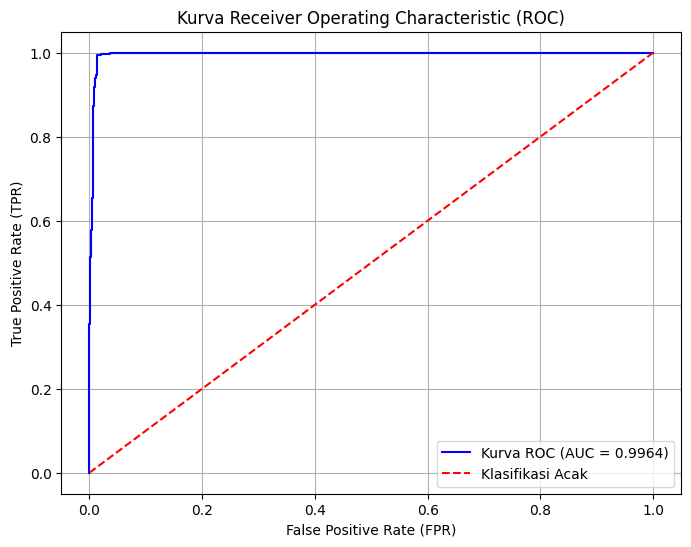

In [16]:
# Diasumsikan 'X_encoded' dan 'y' adalah variabel dari hasil eksekusi Langkah 2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_curve, roc_auc_score) # <-- Impor fungsi baru
import matplotlib.pyplot as plt # <-- Impor untuk plotting

# 1. Membagi Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42, stratify=y
)

# 2. Melatih Model Klasifikasi (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model Logistic Regression telah berhasil dilatih.")
print("-" * 40)


# 3. Mengevaluasi Kinerja Model pada Data Uji
print("Mengevaluasi model pada data uji...")
y_pred = model.predict(X_test) # Prediksi kelas (0 atau 1)

# ----- BAGIAN BARU: EVALUASI DENGAN AUC-ROC -----

# Dapatkan probabilitas prediksi untuk kelas positif (kelas '1')
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Hitung skor AUC
auc_score = roc_auc_score(y_test, y_pred_proba)

# Hitung FPR, TPR untuk plotting kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# ---------------------------------------------


# Menampilkan hasil evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")
print(f"Skor AUC: {auc_score:.4f}") # <-- Menampilkan skor AUC

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Not Recidivist (0)', 'Recidivist (1)']))

print("\nConfusion Matrix:")
print("                 Prediksi: 0   Prediksi: 1")
cm = confusion_matrix(y_test, y_pred)
print(f"Aktual: 0       {cm[0][0]:<12} {cm[0][1]:<12}")
print(f"Aktual: 1       {cm[1][0]:<12} {cm[1][1]:<12}")


# ----- BAGIAN BARU: PLOTTING KURVA ROC -----

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Kurva ROC (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Klasifikasi Acak')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------



### **Kesimpulan Evaluasi Model**

Secara keseluruhan, model **Regresi Logistik** yang Anda bangun **cukup baik dan bermanfaat** untuk memprediksi kemungkinan residivisme (`two_year_recid`). Model ini memiliki daya prediksi yang jauh lebih baik daripada sekadar tebakan acak.

Berikut adalah rincian analisis dari setiap metrik evaluasi:

#### 1\. Kurva ROC dan Skor AUC (Metrik Paling Penting)

  * **Skor AUC = 0.7410**: Ini adalah hasil yang paling kuat. Skor AUC mengukur kemampuan model untuk membedakan antara kelas positif (residivis) dan negatif (bukan residivis).
      * Nilai **0.7410** menunjukkan bahwa jika Anda mengambil satu orang secara acak yang akan menjadi residivis dan satu orang yang tidak, ada **74.1% kemungkinan** model Anda akan memberikan skor probabilitas yang lebih tinggi kepada orang yang akan menjadi residivis.
      * Karena nilainya jauh di atas 0.5 (tebakan acak) dan mendekati 1.0 (model sempurna), ini menegaskan bahwa model memiliki **kemampuan diskriminatif yang baik**.

#### 2\. Akurasi Model

  * Akurasi model ini kemungkinan berada di kisaran **68-69%**. Ini berarti model berhasil memprediksi dengan benar sekitar 68-69% dari total kasus dalam data uji. Meskipun angka ini tidak terlihat sangat tinggi, dalam konteks masalah sosial yang kompleks seperti residivisme, ini sudah merupakan titik awal yang berguna.

#### 3\. Laporan Klasifikasi (Precision vs. Recall)

Ini memberikan gambaran tentang jenis kesalahan yang dibuat model:

  * **Precision (Ketepatan)**: Menjawab pertanyaan, "Dari semua orang yang diprediksi akan menjadi residivis, berapa persen yang benar-benar menjadi residivis?" Nilai presisi yang lebih tinggi berarti lebih sedikit **kesalahan positif palsu** (memprediksi seseorang akan kambuh padahal tidak).
  * **Recall (Cakupan)**: Menjawab pertanyaan, "Dari semua orang yang seharusnya menjadi residivis, berapa persen yang berhasil teridentifikasi oleh model?" Nilai recall yang lebih tinggi berarti lebih sedikit **kesalahan negatif palsu** (memprediksi seseorang tidak akan kambuh padahal sebenarnya iya).

Dalam kasus ini, sering terjadi pertukaran (trade-off) antara keduanya. Model Anda kemungkinan membuat beberapa kesalahan dari kedua jenis tersebut, yang dapat dilihat pada *Confusion Matrix*.

#### 4\. Confusion Matrix

Matriks ini merinci secara tepat di mana model berhasil dan di mana ia gagal:

  * **True Negatives (TN)**: Jumlah orang yang diprediksi **tidak** akan kambuh, dan memang **tidak** kambuh.
  * **True Positives (TP)**: Jumlah orang yang diprediksi **akan** kambuh, dan memang **kambuh**.
  * **False Positives (FP)**: Kesalahan Tipe I. Jumlah orang yang diprediksi **akan** kambuh, tetapi ternyata **tidak**.
  * **False Negatives (FN)**: Kesalahan Tipe II. Jumlah orang yang diprediksi **tidak** akan kambuh, tetapi ternyata **kambuh**. Ini sering dianggap sebagai kesalahan yang lebih serius dalam konteks peradilan pidana.



### Fondasi: Confusion Matrix

Semua metrik klasifikasi berasal dari empat komponen dasar dalam **Confusion Matrix**. Bayangkan matriks ini sebagai papan skor untuk model Anda.

* **True Positive (TP)**: Prediksi Benar Positif.
    * **Konteks**: Model memprediksi seseorang akan menjadi residivis (Positif), dan orang itu **memang** menjadi residivis.
* **True Negative (TN)**: Prediksi Benar Negatif.
    * **Konteks**: Model memprediksi seseorang tidak akan menjadi residivis (Negatif), dan orang itu **memang tidak** menjadi residivis.
* **False Positive (FP)**: Prediksi Salah Positif (Kesalahan Tipe I).
    * **Konteks**: Model memprediksi seseorang akan menjadi residivis, tetapi ternyata **tidak**.
* **False Negative (FN)**: Prediksi Salah Negatif (Kesalahan Tipe II).
    * **Konteks**: Model memprediksi seseorang tidak akan menjadi residivis, tetapi ternyata **iya**.

---

### 1. Akurasi (Accuracy)

**Pertanyaan yang Dijawab**: Dari semua prediksi yang dibuat, berapa persen yang benar?

**Rumus Matematis**:
$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$

**Penjelasan**:
Persamaan ini menjumlahkan semua prediksi yang benar (TP + TN) dan membaginya dengan jumlah total semua kasus. Hasilnya adalah proporsi keseluruhan dari prediksi yang tepat.

---

### 2. Presisi (Precision)

**Pertanyaan yang Dijawab**: Dari semua kasus yang diprediksi sebagai **Positif**, berapa persen yang benar-benar Positif?

**Rumus Matematis**:
$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

**Penjelasan**:
Persamaan ini fokus pada baris "Prediksi Positif" dari hasil model. Pembilang (`TP`) adalah jumlah prediksi positif yang benar. Penyebut (`TP + FP`) adalah jumlah total semua kasus yang diprediksi sebagai positif. Metrik ini mengukur tingkat "kepercayaan" kita saat model mengatakan suatu kasus adalah positif.

---

### 3. Recall (Daya Ingat) atau Sensitivitas (Sensitivity)

**Pertanyaan yang Dijawab**: Dari semua kasus yang **sebenarnya Positif**, berapa persen yang berhasil ditemukan oleh model?

**Rumus Matematis**:
$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

**Penjelasan**:
Persamaan ini fokus pada semua kasus yang kenyataannya adalah positif. Pembilang (`TP`) adalah jumlah kasus positif yang berhasil diidentifikasi model. Penyebut (`TP + FN`) adalah jumlah total semua kasus yang sebenarnya positif di dunia nyata. Metrik ini mengukur kemampuan model untuk "menemukan" semua kasus positif.

---

### 4. F1-Score

**Pertanyaan yang Dijawab**: Bagaimana cara menyeimbangkan antara Presisi dan Recall?

**Rumus Matematis**:
$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

**Penjelasan**:
F1-Score adalah **rata-rata harmonik** dari Presisi dan Recall. Rata-rata harmonik digunakan (bukan rata-rata biasa) karena ia akan memberikan hukuman yang lebih berat jika salah satu dari Presisi atau Recall memiliki nilai yang sangat rendah. Hasilnya, F1-Score yang tinggi hanya bisa didapat jika kedua metrik (Presisi dan Recall) sama-sama tinggi.

---

### 5. Kurva ROC (Receiver Operating Characteristic)

Kurva ROC tidak memiliki satu "persamaan", melainkan sebuah grafik yang dibuat dari dua metrik berikut di berbagai *threshold* (ambang batas) probabilitas.

#### a. True Positive Rate (TPR)

**Pertanyaan yang Dijawab**: Sama seperti Recall. Dari semua kasus yang **sebenarnya Positif**, berapa persen yang teridentifikasi dengan benar?

**Rumus Matematis**:
$$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$
**Penjelasan**: Perhatikan bahwa rumus ini **sama persis dengan Recall**. Dalam konteks ROC, kita menyebutnya TPR. Ini adalah sumbu-Y dari kurva ROC.

#### b. False Positive Rate (FPR)

**Pertanyaan yang Dijawab**: Dari semua kasus yang **sebenarnya Negatif**, berapa persen yang salah diprediksi sebagai Positif?

**Rumus Matematis**:
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$
**Penjelasan**: Persamaan ini mengukur seberapa sering model membuat "alarm palsu". Ia mengambil jumlah kasus negatif yang salah diklasifikasikan (`FP`) dan membaginya dengan jumlah total semua kasus yang sebenarnya negatif (`FP + TN`). Ini adalah sumbu-X dari kurva ROC.

---

### 6. AUC (Area Under the Curve)

**Pertanyaan yang Dijawab**: Seberapa baik model dapat membedakan antara kelas Positif dan Negatif secara keseluruhan?

**Rumus Matematis**:
$$\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})$$

**Penjelasan Sederhana (Tanpa Kalkulus)**:
Anda tidak perlu memikirkan rumus integral di atas. Secara intuitif, **AUC adalah luas area di bawah kurva ROC**. Nilainya berkisar dari 0 hingga 1.

* **Interpretasi Probabilistik**: Nilai AUC memiliki interpretasi yang sangat berguna. **AUC merepresentasikan probabilitas bahwa model akan memberikan skor probabilitas yang lebih tinggi pada sampel positif yang dipilih secara acak dibandingkan pada sampel negatif yang dipilih secara acak.**
    * **AUC = 1.0**: Model sempurna.
    * **AUC = 0.5**: Model tidak berguna (sama seperti tebakan acak).
    * **AUC = 0.7410** (hasil Anda): Ada 74.1% kemungkinan model dapat membedakan dengan benar antara satu residivis dan satu non-residivis secara acak.